### Demonstration for K-means Algorithm

#### PROBLEM STATEMENT ---- CREDIT CARD EXAMPLE

We want to try to divide the pool of customers in some groups which shows similarity within the group; and are different from others.
    
We can use this analysis to sell different types of Credit Cards to them.
    
The project will help us incerese our business.

In [2]:
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

    Because no company will give us their propritary data; we will have to
    create a sample data for ourselves.
    
    Lets create a data set for 
    600 customers
    
    and have 2 features about them:
        1. Travel_Factor : A measure of how much they like to travel
        2. Shoping_Factor : A measure of how much they like to shop

In [3]:
# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

 Lets see how to data looks like

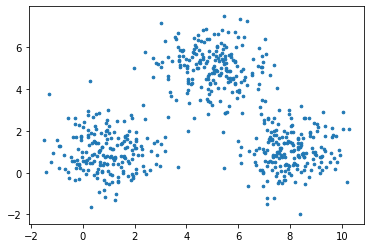

In [4]:
plt.scatter(data[:,0], data[:,1], s=7)

As we know, in K-means algorithm, we need to have a pre-decided k value.
    
So lets assume some value of K.
    
Lets see how the initial K centers will be look like along the data.

[[ 7.727369    2.39224968]
 [ 0.45046888 -1.38160467]
 [ 5.01853082  1.38625855]
 [ 3.41854475  2.2128847 ]]


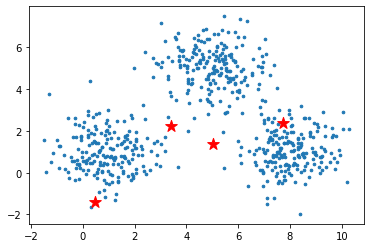

In [33]:
# Number of clusters
k = 4
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

print(centers)
# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='red', s=150)


No lets code for the Algorithm.
We will keep track of:
  1. old and new centers
  2. distance of all points from centres
  3. Which group the customer belon in
  4. the measure of movement in centres.

In [34]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

When, after an update, the estimate of that center stays the same, 
    we need to stop the itteration and we have received our final groups.

In [59]:
#while error != 0:
# Measure the distance to every center
for i in range(k):
    distances[:,i] = np.linalg.norm(data - centers_new[i], axis=1) # incorporate manhatton
# Assign all training data to closest center
clusters = np.argmin(distances, axis = 1)

####  Plot the data and the centers generated as random

array([[8.41405621, 1.62384518],
       [0.92307285, 0.9884115 ],
       [7.42968227, 0.37122767],
       [4.98161489, 5.06818128]])

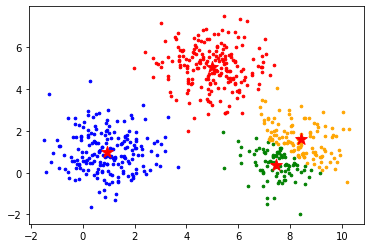

In [60]:

colors=['orange', 'blue', 'green','red']
for j in range(n):
    plt.scatter(data[j, 0], data[j,1], s=7, color = colors[int(clusters[j])])

plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='red', s=150)


centers_old = deepcopy(centers_new)
 # Calculate mean for every cluster and update the center
for i in range(k):
    centers_new[i] = np.mean(data[clusters == i], axis=0)
error = np.linalg.norm(centers_new - centers_old)
centers_new   

In [61]:
error = np.linalg.norm(centers_new - centers_old)
error

0.01760421419793028